In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [101]:
# Load the dataset and perform initial inspection
df = pd.read_csv("climate_action_data.csv")
# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [149]:
# More intial inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      799 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               794 non-null    float64
 3   Soil_pH                        794 non-null    float64
 4   Temperature(C)                 794 non-null    float64
 5   Humidity(%)                    794 non-null    float64
 6   Crop_Type                      795 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  794 non-null    float64
 8   Irrigation_Recommended(mm)     794 non-null    float64
 9   Drone_Image_ID                 799 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.7+ KB


Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [192]:
# Descriptive statistics
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,44.828521,6.252393,26.477694,60.120301,87.417168,17.382957
std,20.447738,1.021801,4.864196,17.413057,34.823403,7.139266
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.970000,5.330000,22.325000,46.100000,57.825000,11.300000
50%,45.390000,6.280000,26.600000,59.800000,85.700000,17.400000
75%,62.642500,7.080000,30.600000,75.300000,117.675000,23.675000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


In [ ]:
#  Handle erroneous entries - Replace 'error' with NaN
df.replace("error", np.nan, inplace=True)

In [ ]:
#  Convert numeric columns to appropriate types
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass  # Keep non-numeric as is (e.g., crop type)

In [174]:
# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [176]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 799
Number of duplicate dates: 1


(798, 10)

In [177]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      798 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               798 non-null    float64
 3   Soil_pH                        798 non-null    float64
 4   Temperature(C)                 798 non-null    float64
 5   Humidity(%)                    798 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64
 8   Irrigation_Recommended(mm)     798 non-null    float64
 9   Drone_Image_ID                 798 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.6+ KB
Missing values after all cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)      

In [ ]:
# Check for missing values or null values
import pandas as pd 
df = pd.read_csv("climate_action_data.csv")
missing_values = df.isnull().sum()
print("Missing values in each column (including zeros):")
print(missing_values)

Missing values in each column (including zeros):
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [224]:
# Define the appropriate column groups
numeric_cols = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
    'Irrigation_Recommended(mm)'
]
categorical_cols = ['Sensor_ID', 'Date', 'Crop_Type', 'Drone_Image_ID']

# Convert numeric columns to numeric type and handle missing values
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  
        df[col] = df[col].fillna(df[col].median())         

# Handle missing values in categorical columns using mode
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])    

# Final check for missing values
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [199]:
# Wrong Data Types
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

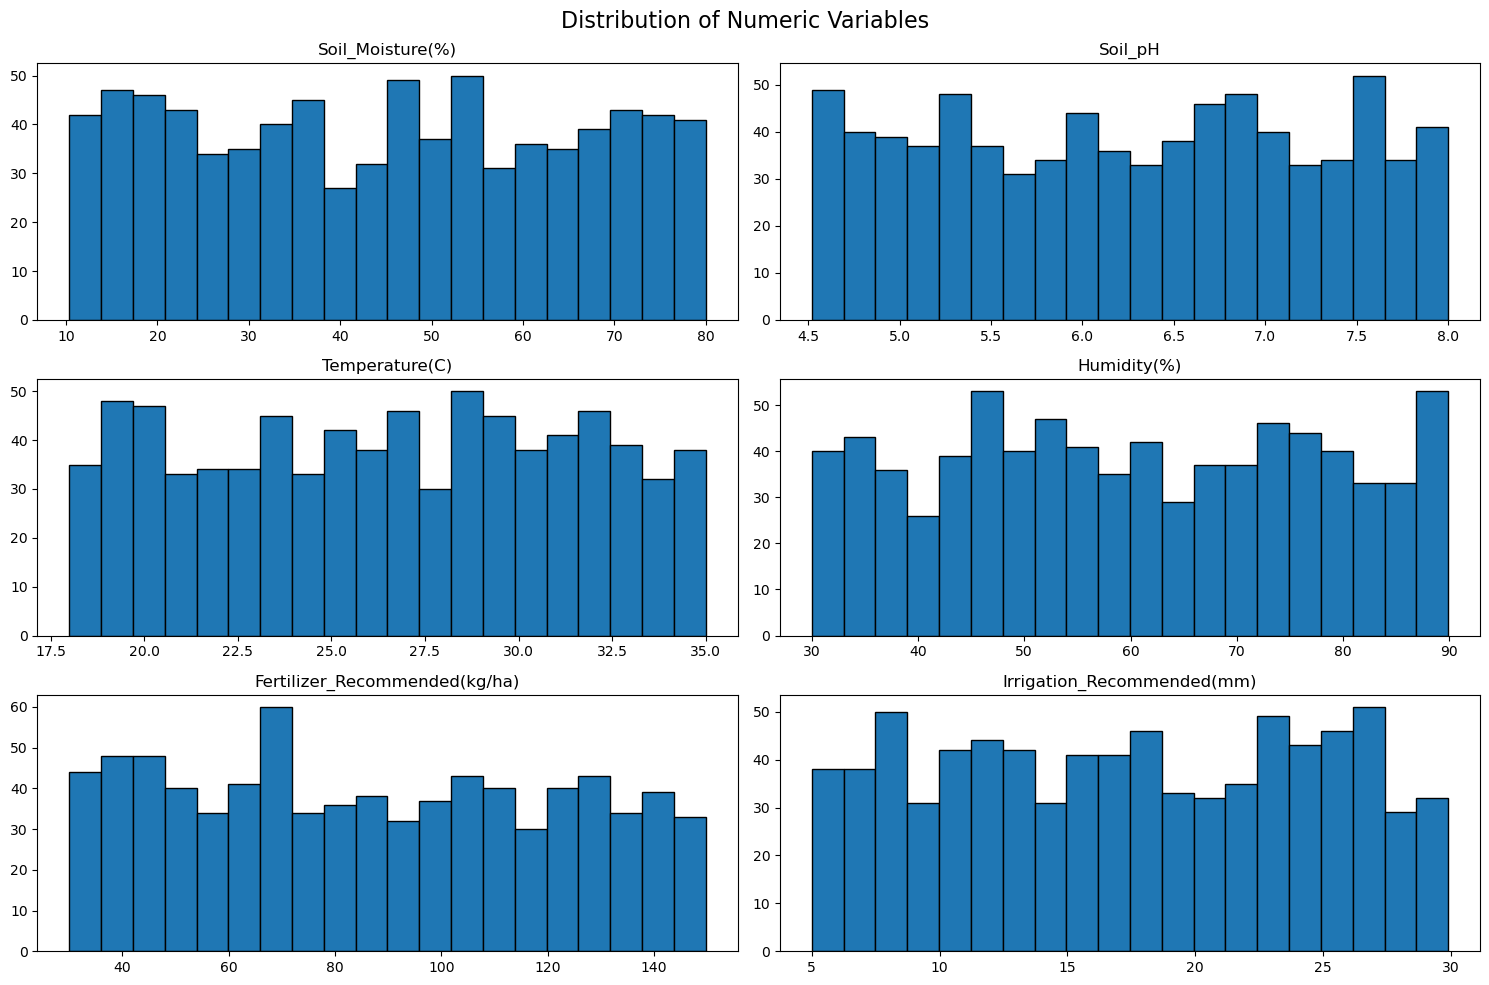

In [133]:
# Define numeric columns
numeric_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]

# Plot histograms
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black', grid=False)
plt.suptitle('Distribution of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

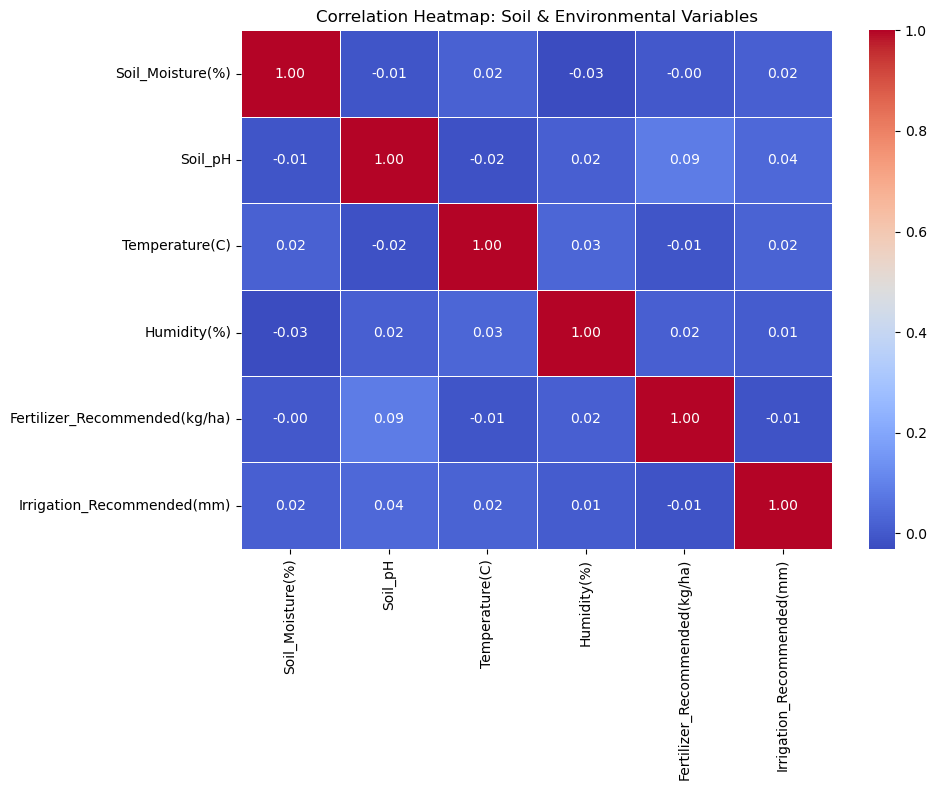

In [ ]:
# Correlation analysis
corr_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]
# Correlation heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Soil & Environmental Variables")
plt.tight_layout()
plt.show()


In [34]:
#  Variables influencing fertilizer recommendations
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    correlations = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)')
    print("\nVariables Most Influencing Fertilizer Recommendations:\n", correlations.sort_values(ascending=False))



Variables Most Influencing Fertilizer Recommendations:
 Soil_pH                       0.085576
Humidity(%)                   0.017063
Soil_Moisture(%)             -0.001727
Temperature(C)               -0.008142
Irrigation_Recommended(mm)   -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [18]:
# determine the crop type with the highest average soil moisture
import pandas as pd 
df = pd.read_csv("climate_action_data.csv")
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')

highest_moisture_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
moisture_value = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().max()
print(f"Crop with highest soil moisture: {highest_moisture_crop} ({moisture_value:.2f}%)")


Crop with highest soil moisture: Wheat (46.73%)


In [195]:
# Irrigation suggestion for crops with avg temp > 30℃
high_temp_crops = df[df['Temperature(C)'] > 30]
irrigation_adjustment = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print("\nSuggested Irrigation Adjustments for Crops with Avg Temp > 30°C:\n", irrigation_adjustment)



Suggested Irrigation Adjustments for Crops with Avg Temp > 30°C:
 Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64


In [6]:
# Export the cleaned DataFrame
df = pd.read_csv("climate_action_data.csv")
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'")



Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'


In [38]:
#  RECOMMENDATIONS
print("\n--- INSIGHTS & RECOMMENDATIONS ---")
print(f"\n1. Most influential variables for fertilizer recommendations include: {correlations.sort_values(ascending=False).head(2).index.tolist()}")
print(f"\n2. The crop type with the highest average soil moisture is **{max_crop}**, suggesting it may need less irrigation than others.")
print(f"\n3. For crops experiencing average temperatures above 30°C, consider increasing irrigation amounts as shown below:\n{irrigation_adjustment}")



--- INSIGHTS & RECOMMENDATIONS ---

1. Most influential variables for fertilizer recommendations include: ['Soil_pH', 'Humidity(%)']

2. The crop type with the highest average soil moisture is **Wheat**, suggesting it may need less irrigation than others.

3. For crops experiencing average temperatures above 30°C, consider increasing irrigation amounts as shown below:
Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64
